<div style="background-color:#262626; text-align: center;">
<img src="https://fiapfunctions.blob.core.windows.net/datasets/capa.png">
</div>

# Why Mel Scale is important?

!pip install youtube-dl

In [1]:
import librosa
import librosa.display

import youtube_dl
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Audio, display, Image, YouTubeVideo

In [2]:
def option_youtube(song, link):
    options = {
        'format': 'bestaudio/best',
        'extractaudio': True,
        'audioformat': 'wav',
        'outtmpl': 'audios/youtube/' + song + '.%(ext)s'}
    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([link])

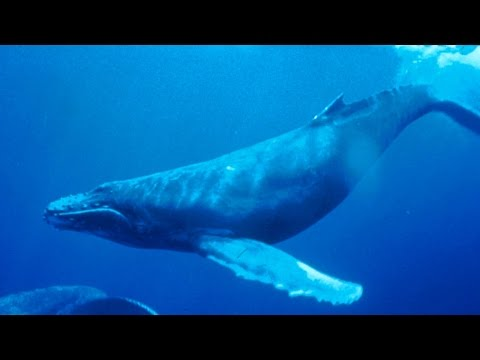

In [3]:
YouTubeVideo('W5Trznre92c')

In [4]:
!mkdir audios/youtube

mkdir: cannot create directory ‘audios/youtube’: File exists


In [5]:
option_youtube('Whales_Song', 'https://www.youtube.com/watch?v=W5Trznre92c')

[youtube] W5Trznre92c: Downloading webpage
[download] Destination: audios/youtube/Whales_Song.m4a
[download] 100% of 679.28KiB in 00:0035MiB/s ETA 00:00known ETA
[ffmpeg] Correcting container in "audios/youtube/Whales_Song.m4a"


In [ ]:
!ffmpeg -i "audios/youtube/Whales_Song.m4a" -vn -ac 1 -ar 44100 -f wav "audios/youtube/Whales_Song.wav"

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/home/vitormeriat/anaconda3 --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5

In [ ]:
!rm audios/youtube/*.m4a
!ls audios/youtube

In [9]:
y, sr = librosa.load('audios/youtube/Whales_Song.wav')

whale_song, _ = librosa.effects.trim(y)
Audio(data=whale_song, rate=sr)

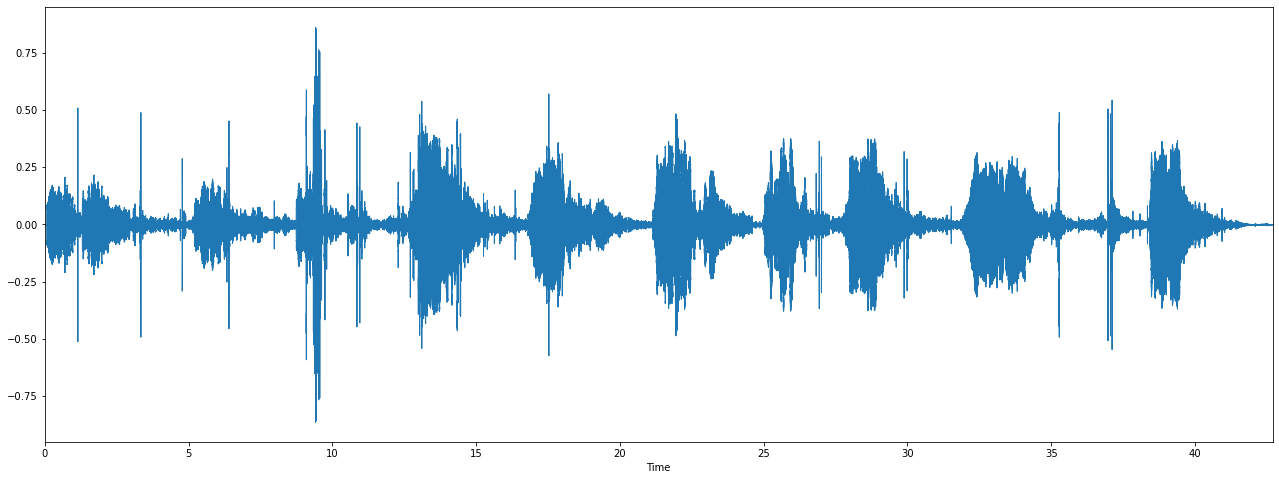

In [10]:
plt.figure(figsize=(22, 8))
librosa.display.waveplot(whale_song, sr=sr)
plt.show()

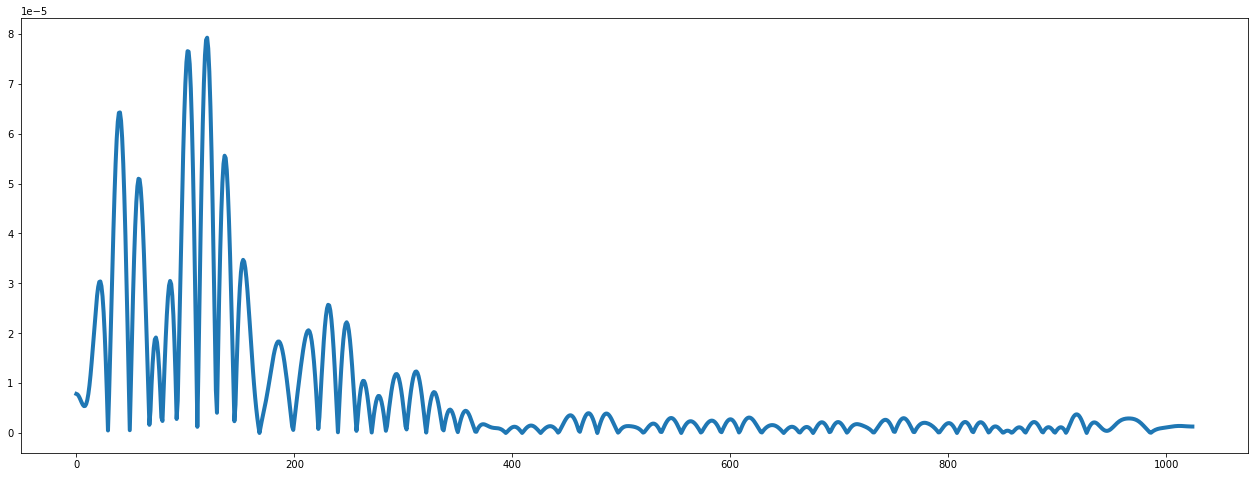

In [11]:
plt.figure(figsize=(22, 8))
n_fft = 2048
D = np.abs(librosa.stft(whale_song[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D, linewidth=4)
plt.show()

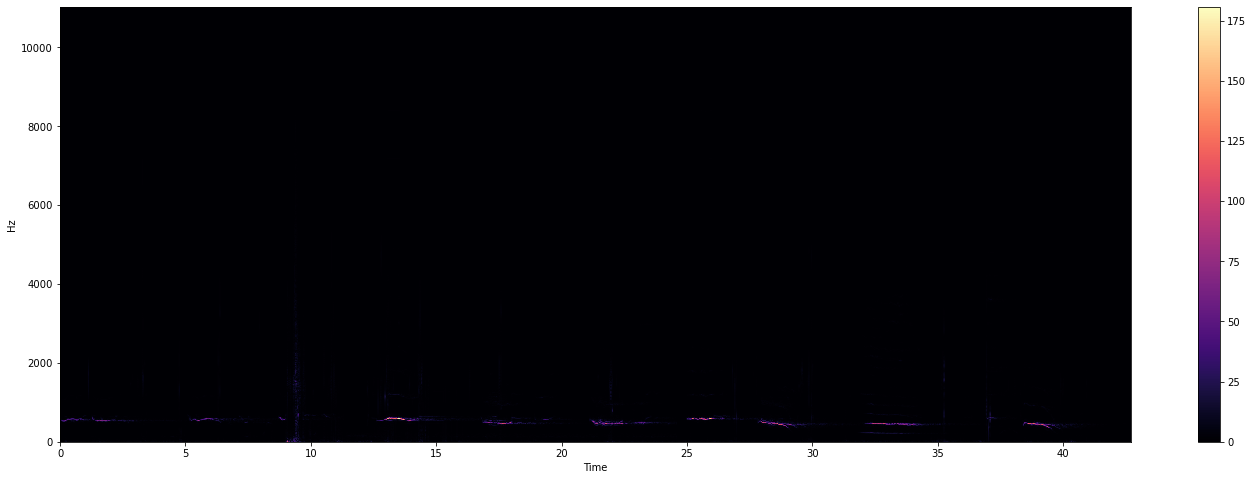

In [12]:
plt.figure(figsize=(24, 8))
hop_length = 512
D = np.abs(librosa.stft(whale_song, n_fft=n_fft, hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

/home/vitormeriat/anaconda3/lib/python3.8/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/vitormeriat/anaconda3/lib/python3.8/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/vitormeriat/anaconda3/lib/python3.8/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


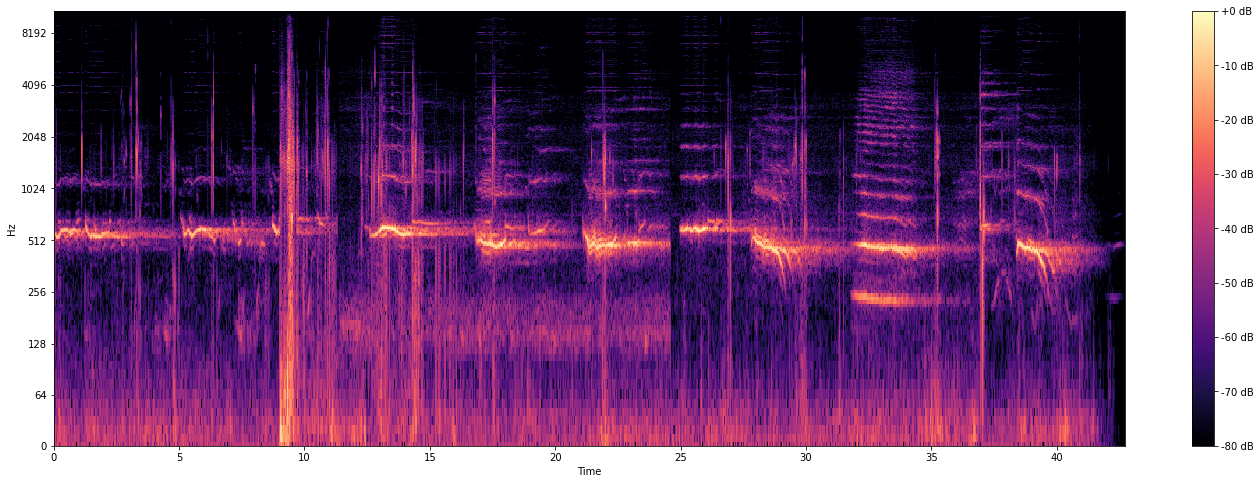

In [13]:
plt.figure(figsize=(24, 8))
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.show()

In [14]:
n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

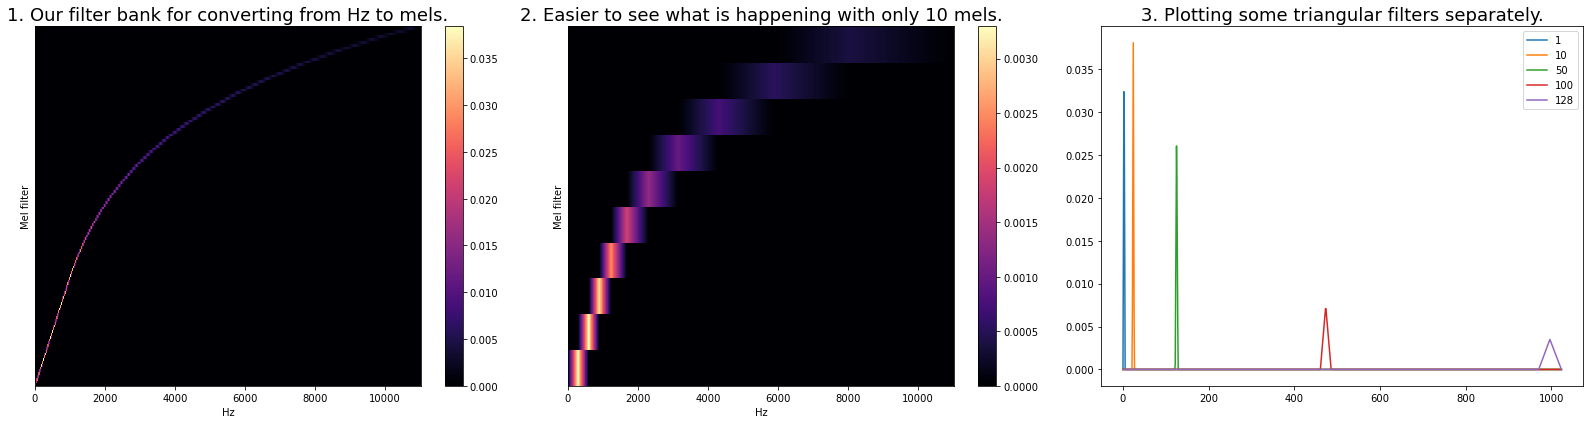

In [15]:
plt.figure(figsize=(22, 6))

plt.subplot(1, 3, 1);
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('1. Our filter bank for converting from Hz to mels.', fontsize=18);


plt.subplot(1, 3, 2);
mel_10 = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=10)
librosa.display.specshow(mel_10, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('2. Easier to see what is happening with only 10 mels.', fontsize=18);

plt.subplot(1, 3, 3);
idxs_to_plot = [0, 9, 49, 99, 127]
for i in idxs_to_plot:
    plt.plot(mel[i]);
plt.legend(labels=['{}'.format(i+1) for i in idxs_to_plot]);
plt.title('3. Plotting some triangular filters separately.', fontsize=18);

plt.tight_layout();

Text(0.5, 1.0, 'One sampled window for example, before and after converting to mel')

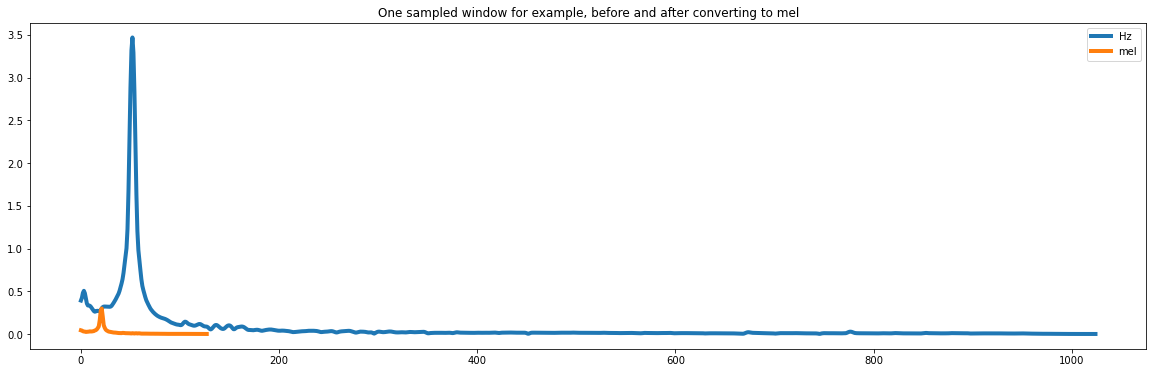

In [16]:
plt.figure(figsize=(20, 6))
plt.plot(D[:, 1], linewidth=4)
plt.plot(mel.dot(D[:, 1]), linewidth=4)
plt.legend(labels=['Hz', 'mel'])
plt.title('One sampled window for example, before and after converting to mel')

/home/vitormeriat/anaconda3/lib/python3.8/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/vitormeriat/anaconda3/lib/python3.8/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


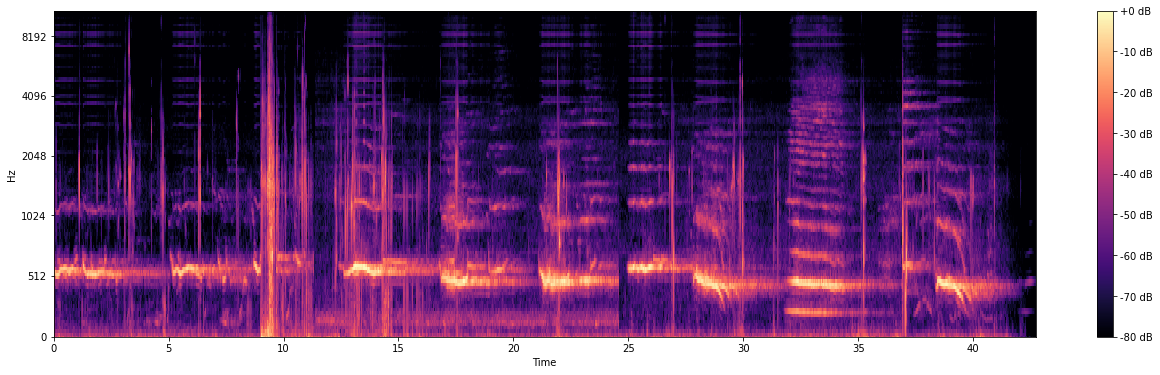

In [17]:
S = librosa.feature.melspectrogram(whale_song, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(22, 6));
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

ref: [Dalya Gartzman](https://www.freecodecamp.org/news/author/dalyag/)